The purpose of this notebook is to perform exploratory analysis on the Sipakmed database. This will explore the separability of normal and abnormal cells along extractable nucleus features, as well as give insight into the expected distributions of these features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stats
from os import listdir
import sys
sys.path.append('../scripts/')
from os import path

#### Sipakmed dataframe

In [2]:
if not path.exists('../data/processed/Sipakmed_existing_database.csv'):
    from sipakmed_to_csv import sipakmed_to_csv
    sipakmed_df = sipakmed_to_csv('../data/external/Sipakmed database features/')
else:
    sipakmed_df = pd.read_csv('../data/processed/Sipakmed_existing_database.csv')

In [3]:
sipakmed_df.head()

,Unnamed: 0,cluster_id,image_id,area,major_axis_length,minor_axis_length,eccentricity,orientation,equivalent_diameter,solidity,...,entropy-G,meanI_B,meanC_B,smooth_B,moment-3-B,uniformity-B,entropy-B,Nucleus/Cytoplasm,Class,Normal
0,0,1,1,108300.0,394.10,363.96,0.38358,48.3380,371.34,0.94167,...,5.3828,105.69,10.8940,0.001822,0.005349,0.027627,5.4535,nuc,s,1
1,1,1,2,50590.0,330.71,217.29,0.75385,5.8796,253.80,0.88165,...,5.2347,115.35,10.2090,0.001600,-0.008656,0.028294,5.3459,nuc,s,1
2,2,1,3,95258.0,450.82,290.24,0.76518,22.9520,348.26,0.90680,...,5.0469,110.24,11.0850,0.001886,0.005759,0.025814,5.4751,nuc,s,1
3,3,1,4,84199.0,363.33,310.51,0.51924,-14.9310,327.42,0.91911,...,5.4830,106.27,11.2150,0.001930,0.009261,0.029336,5.4339,nuc,s,1
4,4,1,5,98175.0,433.48,303.43,0.71416,-22.9330,353.55,0.92263,...,4.9679,115.86,9.7206,0.001451,-0.004682,0.029976,5.2955,nuc,s,1


#### Reduce the dataframe to just nuclei features, and drop 'm' class (this class is on the border of normal/abnormal)

In [4]:
df = sipakmed_df.copy()
df = df[df['Class']!='m']
df = df[df['Nucleus/Cytoplasm']=='nuc']
df['Class'].unique()

array(['s', 'd', 'p', 'k'], dtype=object)

#### Feature engineer a ratio between the major and minor axis

In [5]:
df['major_to_minor'] = df['major_axis_length']/df['minor_axis_length']

#### The easiest features to segment are area, eccentricity or major:minor axis ratio, extent, solidity, and the mean intensity of each channel.

Check for separability along these feature domains 

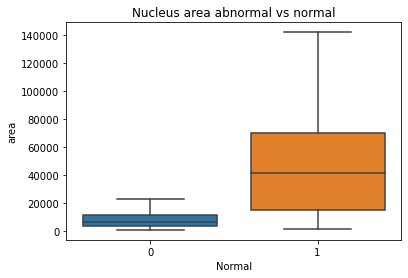

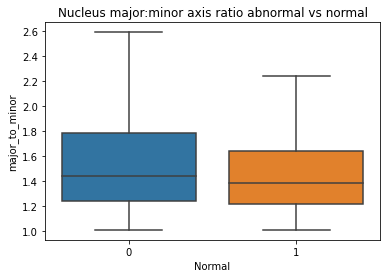

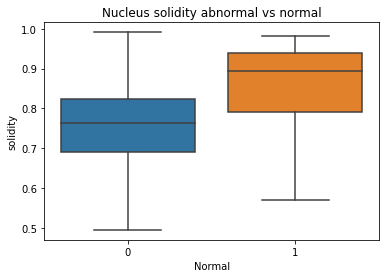

In [6]:
# nucleus area
ax = sns.boxplot(x='Normal',y='area',data=df,showfliers=False)
ax.set_title('Nucleus area abnormal vs normal')
plt.show()

# major:minor axis ratio
ax = sns.boxplot(x='Normal',y='major_to_minor',data=df,showfliers=False)
ax.set_title('Nucleus major:minor axis ratio abnormal vs normal')
plt.show()

# eccentricity
ax = sns.boxplot(x='Normal',y='solidity',data=df,showfliers=False)
ax.set_title('Nucleus solidity abnormal vs normal')
plt.show()

Get characteristics of the distributions of these features to guide subsequent feature segmentation. We want to filter out debris that is smaller than the minimum nucleus size, and debris that is too elliptical

Minimum nucleus size:590.0


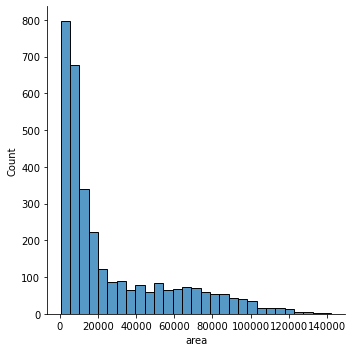

In [8]:
# nucleus area
ax = sns.displot(df['area'],kde=False)
print('Minimum nucleus size:{}'.format(df['area'].min()))

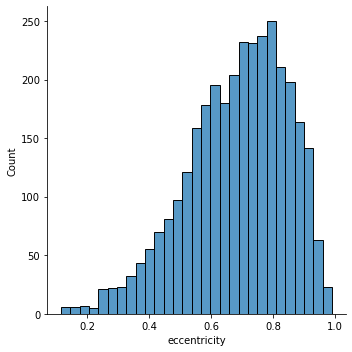

In [9]:
# eccentricity
ax = sns.displot(df['eccentricity'],kde=False)

Expected range = 2.78436901026491


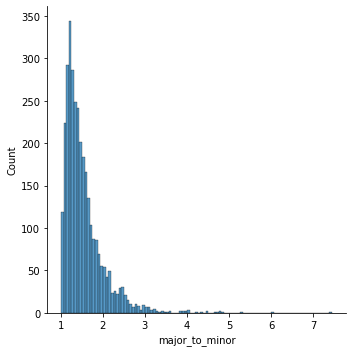

In [10]:
# major: minor axis ratio
ax = sns.displot(df['major_to_minor'],kde=False)
print('Expected range = {}'.format(np.mean(df['major_to_minor']) + np.sqrt(np.mean(df['major_to_minor'])))) # poisson assumption

Minimum solidity:0.35799000000000003


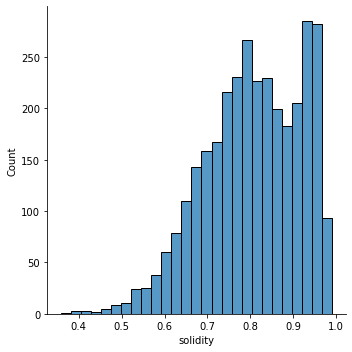

In [11]:
# solidity
ax = sns.displot(df['solidity'],kde=False)
print('Minimum solidity:{}'.format(df['solidity'].min()))

In [12]:
df.to_csv('../data/processed/Sipakmed_nuclei_database.csv')